# Exploring The California Housing Dataset of 1990!

### First time experimenting with autoViz

In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
print('HOUSING_PATH IS:' , HOUSING_PATH)
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
     if not os.path.isdir(housing_path):
            os.makedirs(housing_path)
            tgz_path = os.path.join(housing_path, "housing.tgz")
            print('housing_path is:' , housing_path)
            print('housing.tgz is:' ,tgz_path)
            print('housing_url is:' , housing_url)
            urllib.request.urlretrieve(housing_url, tgz_path)
            housing_tgz = tarfile.open(tgz_path)
            housing_tgz.extractall(path=housing_path)
            housing_tgz.close()

HOUSING_PATH IS: datasets/housing


In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [5]:
housing=load_housing_data()

In [6]:
len(housing)

20640

In [8]:
housing.to_csv('hell.csv')

In [11]:
pd.show_versions()



INSTALLED VERSIONS
------------------
commit           : 2cb96529396d93b46abab7bbc73a208e708c642e
python           : 3.8.10.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.0-74-generic
Version          : #83~18.04.1-Ubuntu SMP Tue May 11 16:01:00 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_IN
LOCALE           : en_IN.ISO8859-1

pandas           : 1.2.4
numpy            : 1.19.2
pytz             : 2021.1
dateutil         : 2.8.1
pip              : 21.1.2
setuptools       : 52.0.0.post20210125
Cython           : 0.29.23
pytest           : 6.2.4
hypothesis       : None
sphinx           : 4.0.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.8
lxml.etree       : 4.6.3
html5lib         : 1.1
pymysql          : None
psycopg2         : None
jinja2           : 3.0.0
IPython          : 7.22.0
pandas_datareader: None
bs4              : 4.9.3
bottleneck   

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

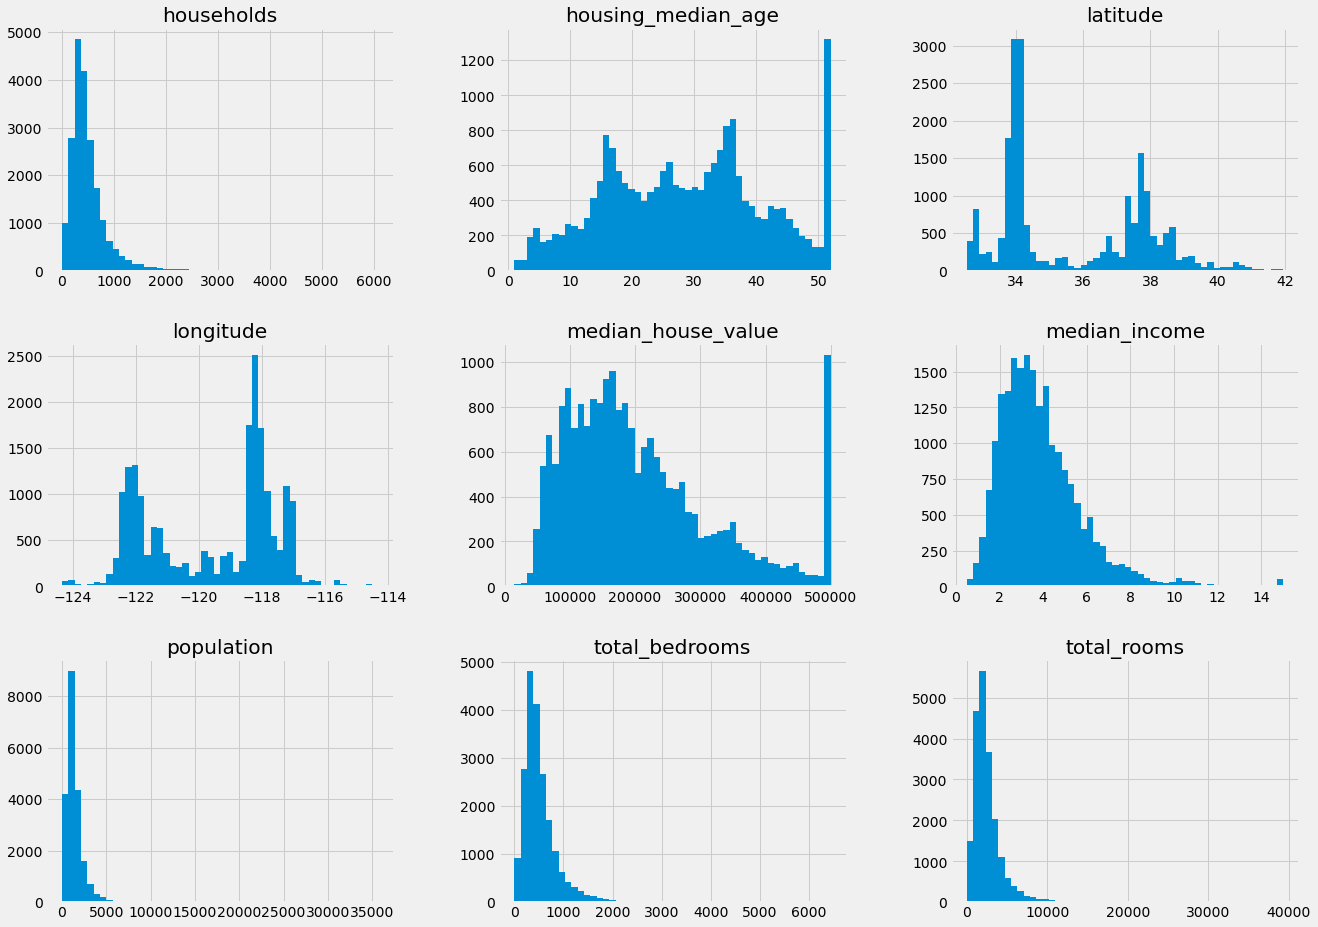

In [43]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
housing.hist(bins=50, figsize=(20,15),)
plt.show()

In [44]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [45]:
housing_with_id=housing.reset_index()

In [47]:
housing_with_id.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY

In [337]:
housing['income_cat']=pd.cut(housing['median_income'], 
                             bins=[0,1.5,3,4.5,6,np.inf] , 
                             labels=[1,2,3,4,5])

In [338]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  households  \
17428    -120.47     34.65                16.0       2549.0       432.0   
16684    -120.59     35.11                25.0       3642.0       673.0   
149      -122.22     37.80                52.0       2721.0       515.0   
11930    -117.39     33.93                26.0       3014.0       485.0   
20032    -119.03     36.07                26.0       3210.0       642.0   

       median_income ocean_proximity  rooms_per_household  \
17428         4.2875      NEAR OCEAN             5.900463   
16684         3.1550       <1H OCEAN             5.411590   
149           4.5428        NEAR BAY             5.283495   
11930         4.8333          INLAND             6.214433   
20032         2.4167          INLAND             5.000000   

       bedrooms_per_room_ration  population_per_household income_cat  
17428                  0.167909                  3.439815          3  
16684                  0.199341                  2.569094          3  
149                    0.198824                  2.300971          4  
11930                  0.163902                  3.777320          4  
20032                  0.201246                  2.971963          2

(array([ 658.,    0., 5265.,    0.,    0., 5789.,    0., 2911.,    0.,
        1889.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

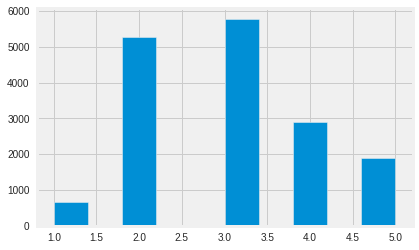

In [339]:
plt.hist(x=housing['income_cat'])

In [341]:
from sklearn.model_selection import StratifiedShuffleSplit

In [343]:
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2)
i=0
for train_index,test_index in sss.split(housing, housing['income_cat']):
    print('train index is ', train_index, ' test index is' , test_index)
    i+=1
    print(i)
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
    

train index is  [7313 5027 8797 ... 7653 6073 3384]  test index is [ 5846  4161  2790 ... 12198 14033 11174]
1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c2a682ca0>,
      dtype=object)

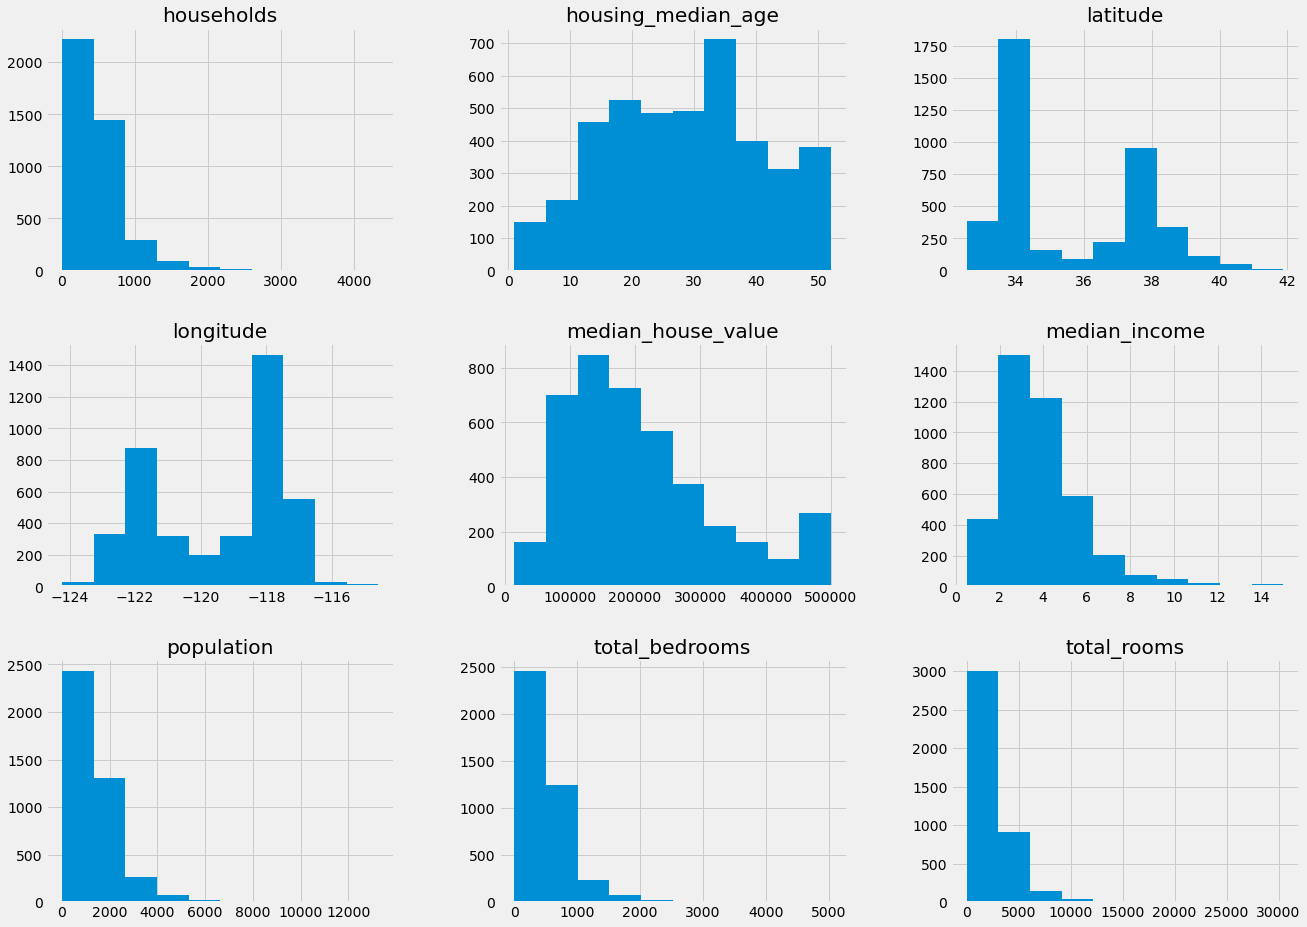

In [68]:
strat_test_set.hist(figsize=(20,15))

[]

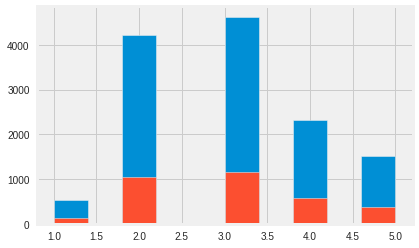

In [344]:
plt.hist(x=strat_train_set['income_cat'])
plt.hist(x=strat_test_set['income_cat'])
plt.plot()

In [74]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set: (20640, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  8
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Regression VISUALIZATION Started #####################


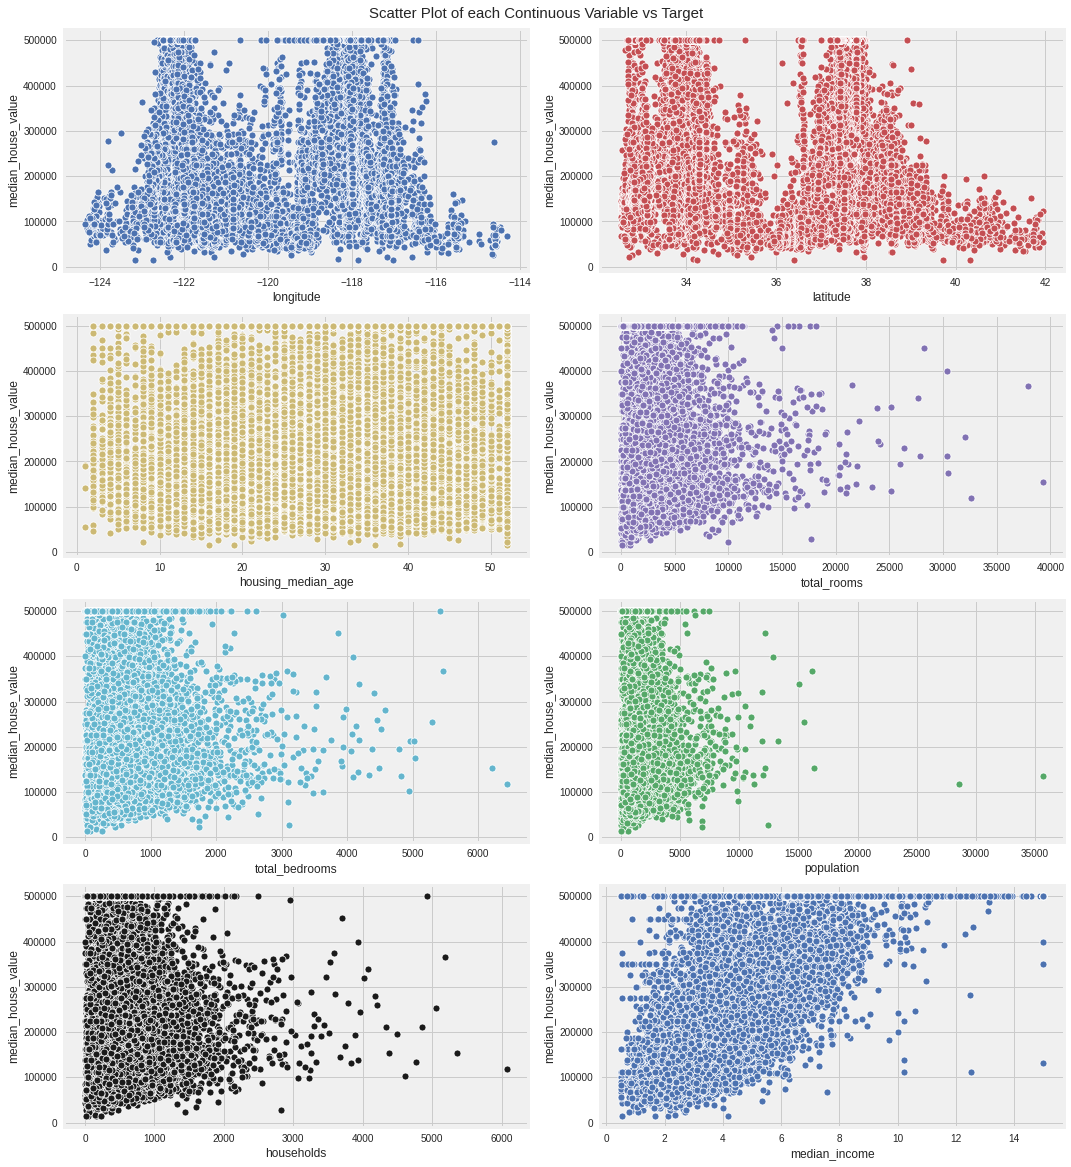

Number of All Scatter Plots = 36


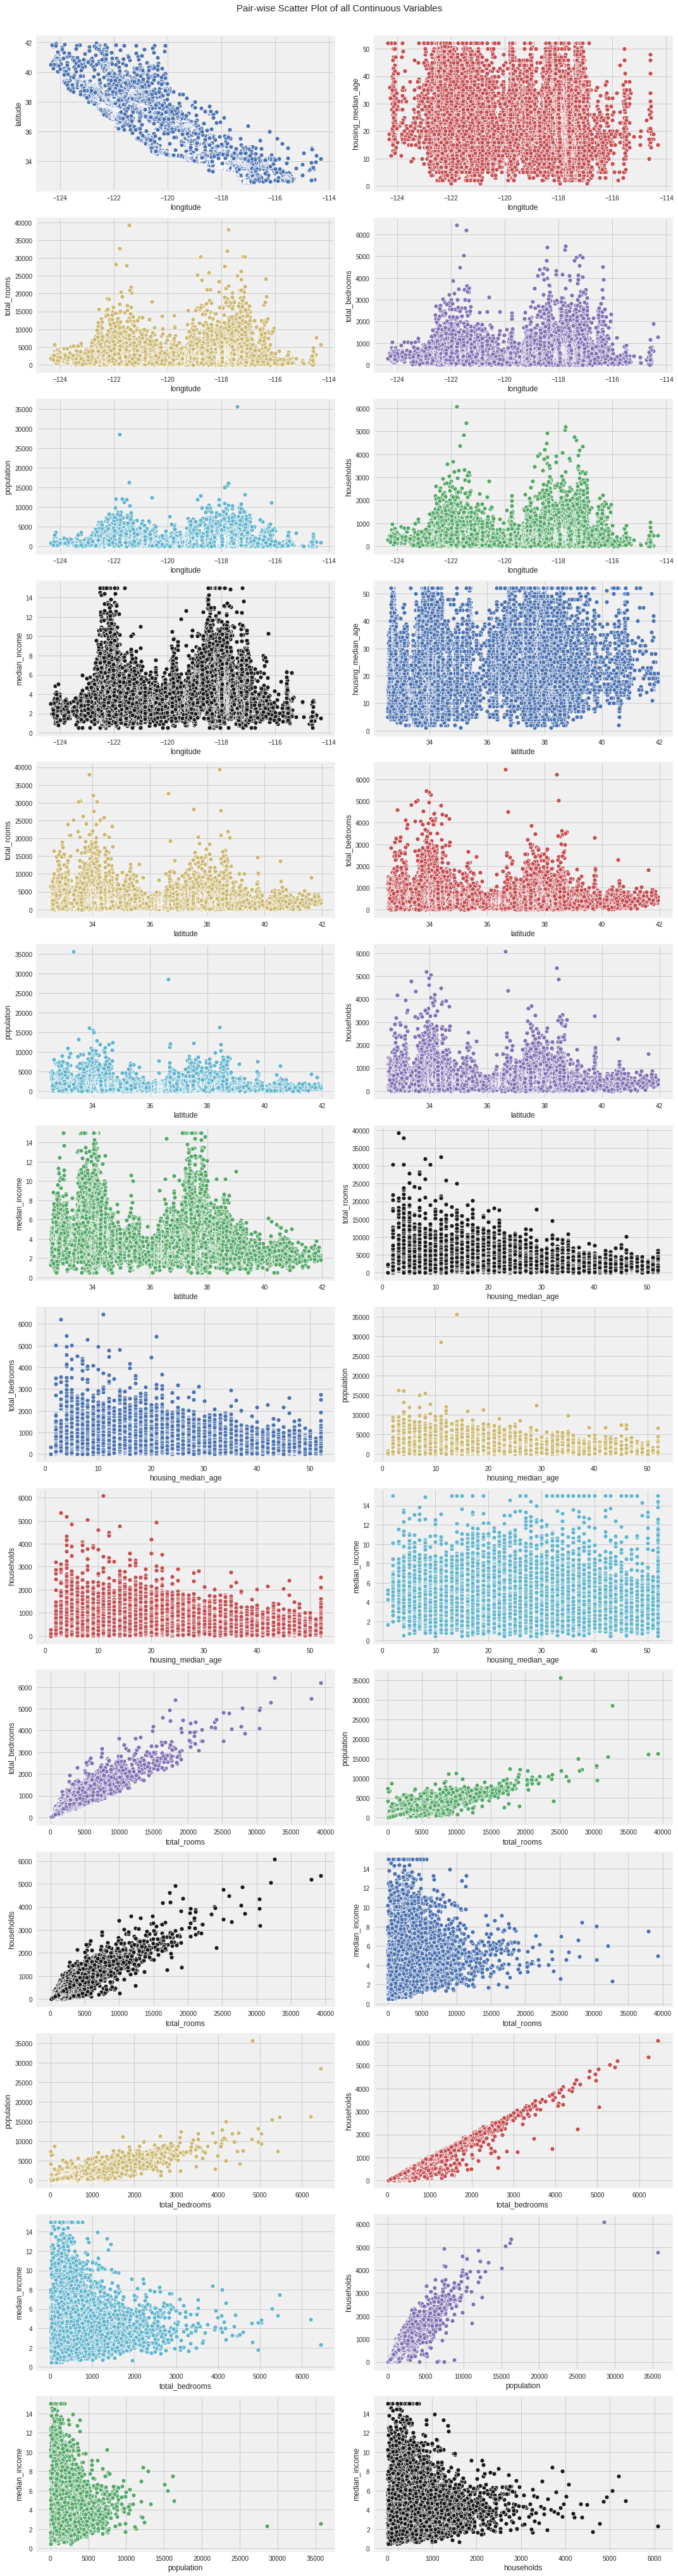

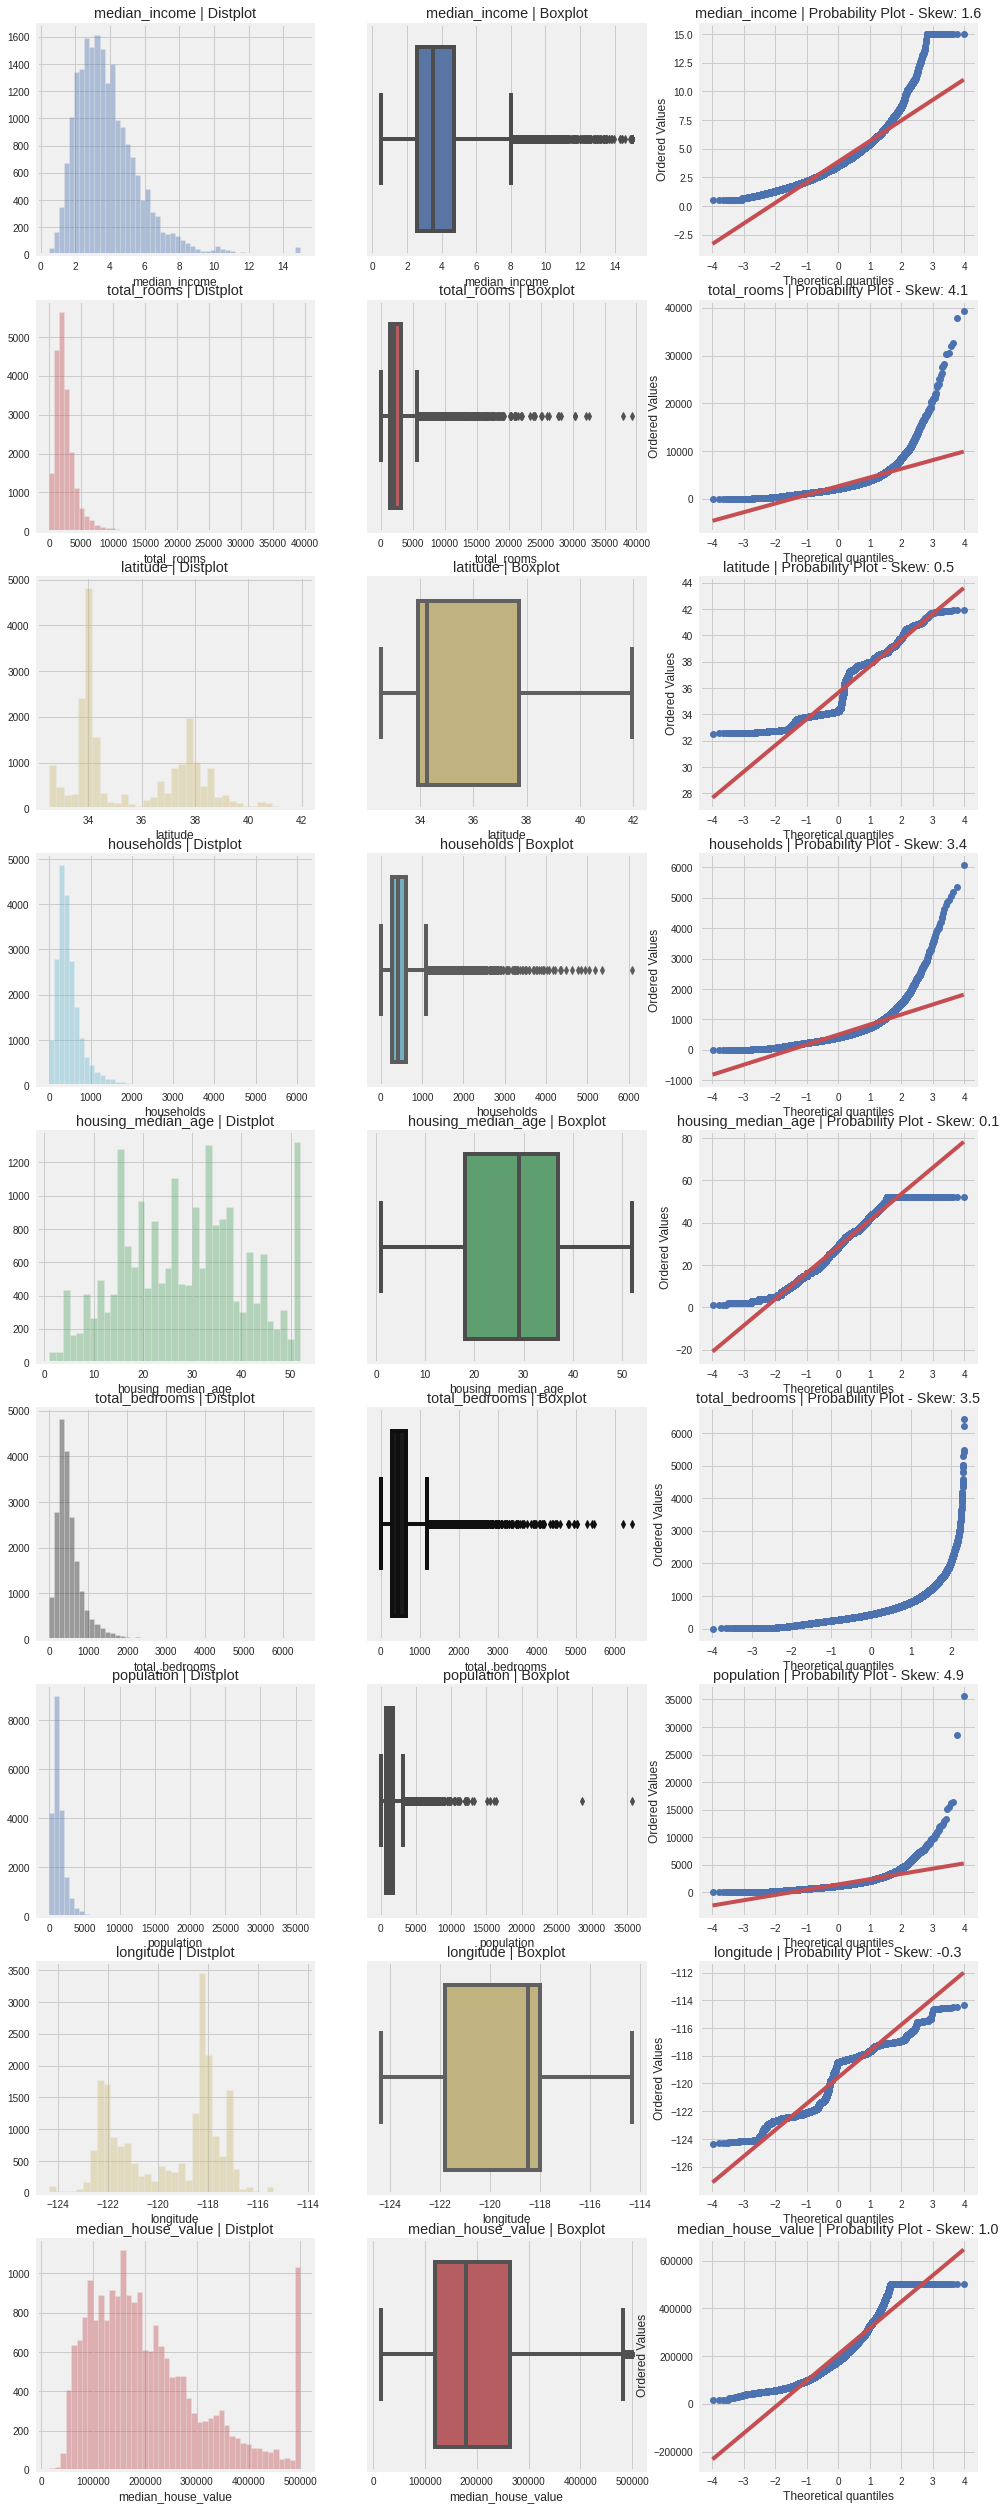

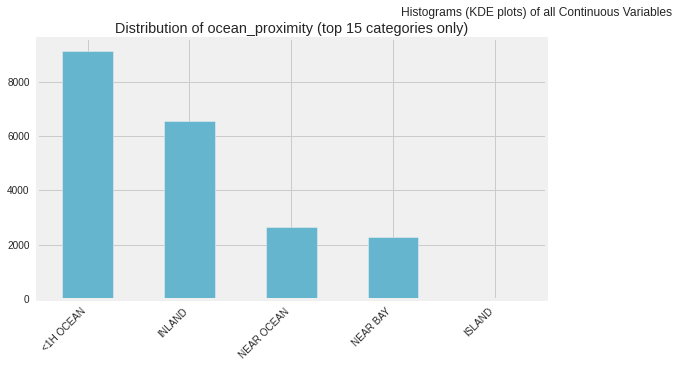

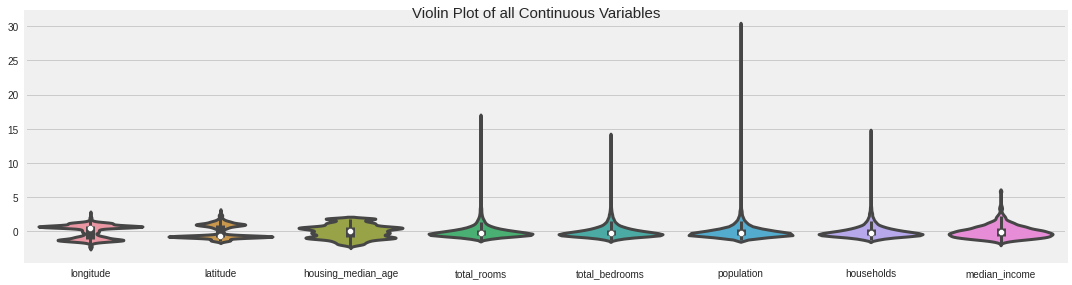

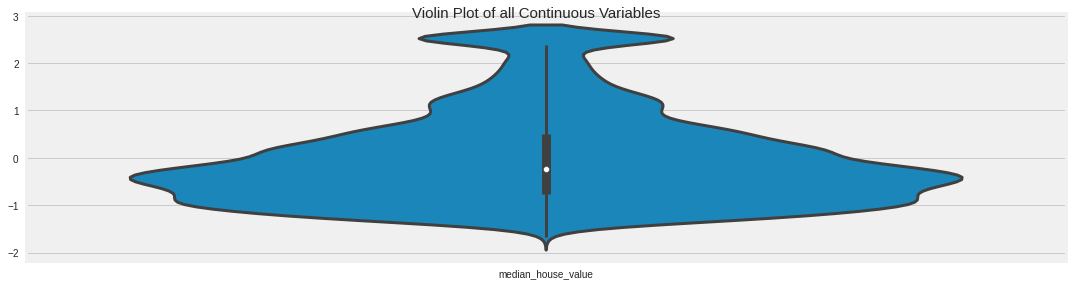

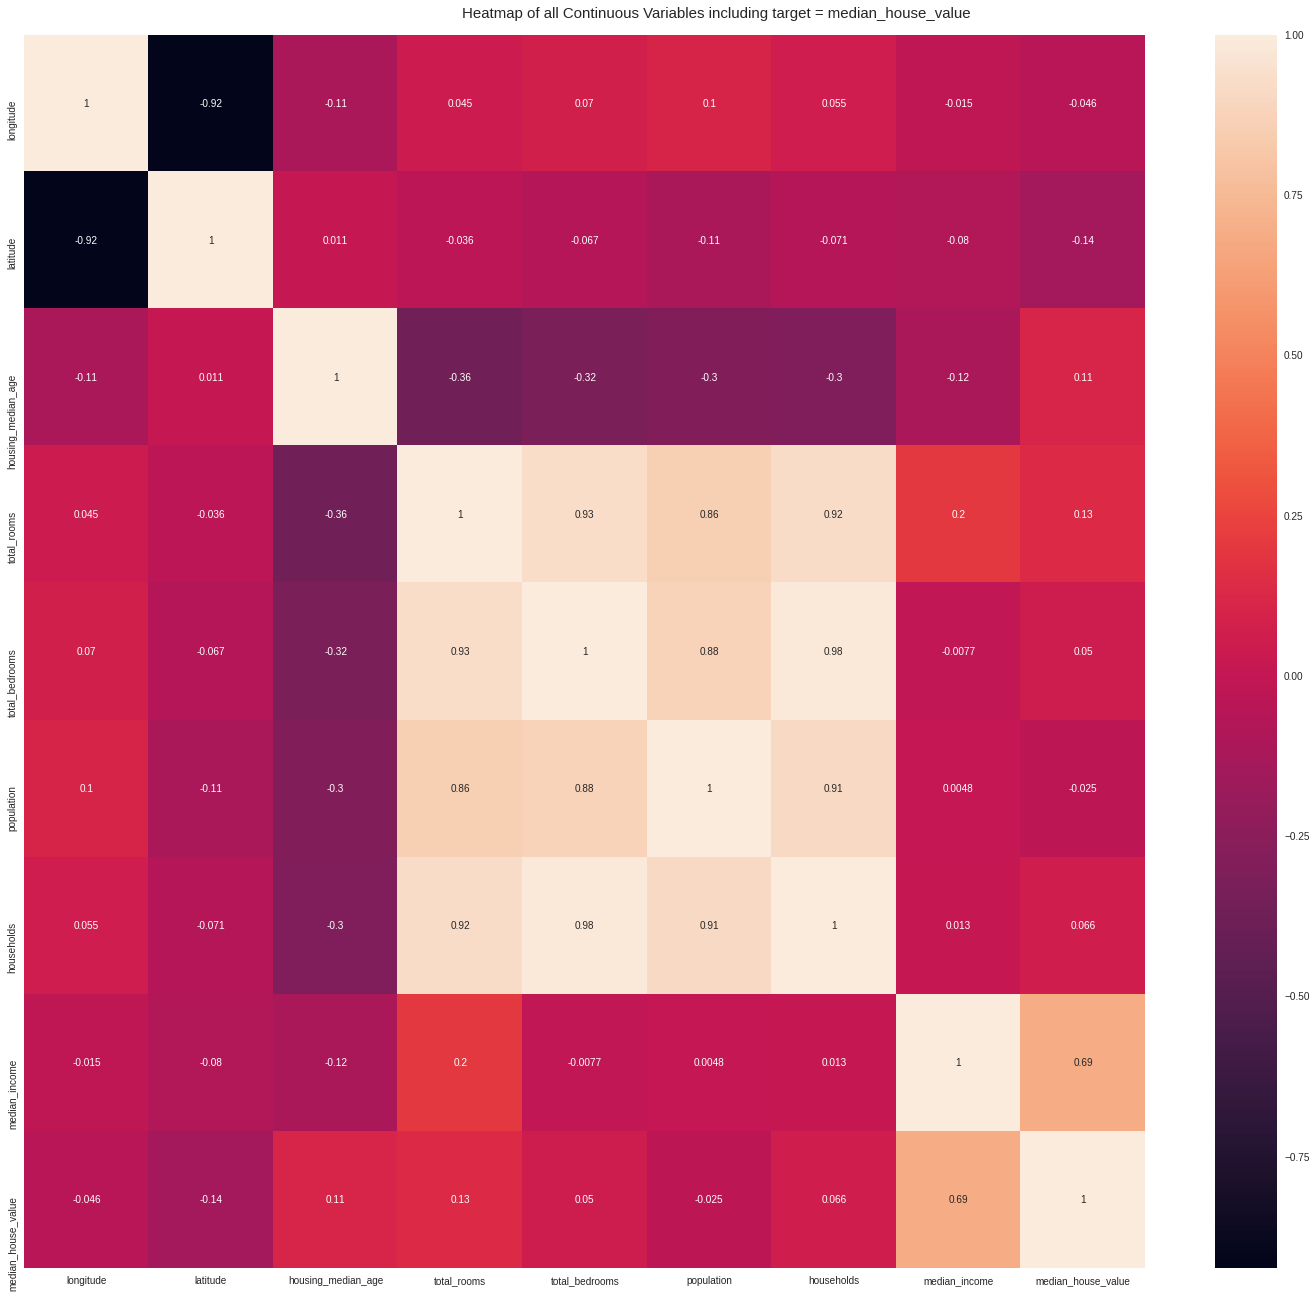

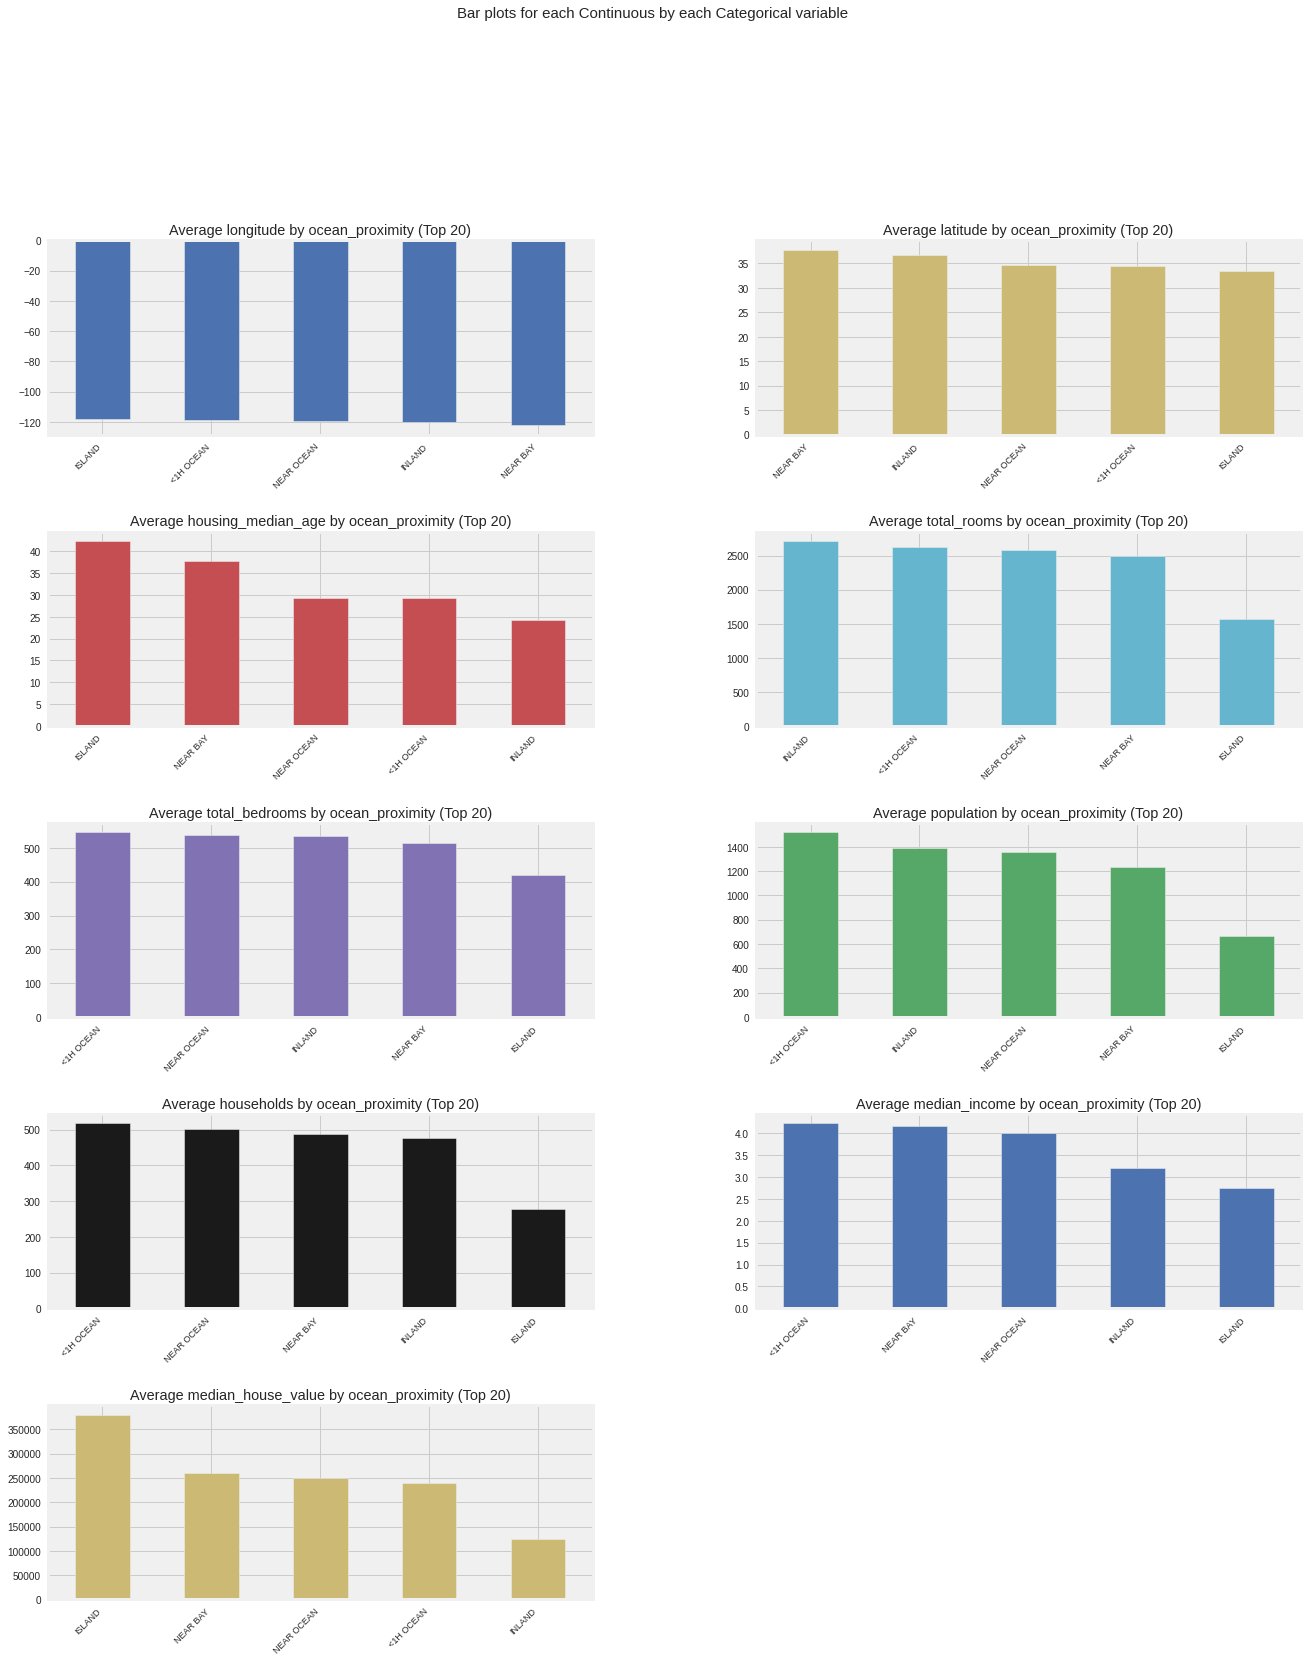

All Plots done
Time to run AutoViz (in seconds) = 37.178

 ###################### VISUALIZATION Completed ########################


In [80]:
plt.style.use('fivethirtyeight')
df=AV.AutoViz('datasets/housing/housing.csv',depVar='median_house_value')

In [108]:
housing.head(50)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17428    -120.47     34.65                16.0       2549.0           428.0   
16684    -120.59     35.11                25.0       3642.0           726.0   
149      -122.22     37.80                52.0       2721.0           541.0   
11930    -117.39     33.93                26.0       3014.0           494.0   
20032    -119.03     36.07                26.0       3210.0           646.0   
12723    -121.38     38.59                38.0       1839.0           287.0   
5133     -118.26     33.97                46.0       1295.0           351.0   
17795    -121.81     37.39                34.0       2218.0           286.0   
3121     -117.74     35.65                15.0       2357.0           484.0   
12472    -121.47     38.58                44.0       2092.0           555.0   
2510     -119.55     36.51                46.0         55.0            11.0   
13428    -117.45     34.10                 9.0       4288.0          1017.0   
20341    -119.03     34.22                24.0       3421.0           656.0   
19195    -122.68     38.44                36.0       1311.0           259.0   
1457     -121.97     37.97                26.0       1977.0           264.0   
10249    -117.87     33.89                19.0       1674.0           243.0   
18955    -122.07     38.24                15.0       7937.0          1635.0   
15306    -117.37     33.19                33.0       2205.0           453.0   
9479     -123.35     39.40                27.0       1321.0           338.0   
13638    -117.32     34.08                46.0       1308.0           276.0   
2828     -119.05     35.40                18.0       1894.0           319.0   
20147    -119.08     34.34                23.0       3065.0           723.0   
12369    -116.43     33.78                17.0       4293.0           712.0   
11885    -117.37     33.98                27.0       1342.0           547.0   
11132    -117.93     33.85                25.0       1026.0           288.0   
14022    -117.16     32.75                19.0       5430.0          1593.0   
11471    -118.00     33.67                34.0       3712.0           667.0   
10272    -117.87     33.87                16.0       1332.0           368.0   
3953     -118.65     34.21                 5.0       5429.0           665.0   
3665     -118.37     34.22                17.0       1787.0           463.0   
12447    -114.49     33.97                17.0       2809.0           635.0   
13050    -121.32     38.59                24.0       4378.0           910.0   
2725     -115.55     32.79                22.0        565.0           162.0   
1183     -121.52     39.50                33.0       1462.0           241.0   
1413     -122.07     37.94                43.0       1454.0           234.0   
3241     -119.56     36.08                37.0        766.0           189.0   
18551    -122.03     36.96                28.0       1607.0           421.0   
14227    -117.04     32.68                13.0       2132.0           425.0   
8203     -118.15     33.78                17.0       1584.0           435.0   
14696    -117.09     32.79                36.0       1529.0           266.0   
13803    -117.53     34.28                35.0       1529.0           338.0   
20509    -121.53     38.60                25.0       5154.0          1105.0   
1515     -122.06     37.89                21.0       4985.0          1590.0   
8251     -118.18     33.78                26.0       3042.0          1253.0   
8289     -118.14     33.76                37.0       3242.0           698.0   
6416     -118.02     34.14                31.0       6854.0          1578.0   
5882     -118.34     34.17                46.0       1718.0           344.0   
17032    -122.27     37.51                39.0       3996.0           793.0   
11282    -117.95     33.78                26.0       4115.0           883.0   
6346     -117.75     34.05                37.0        378

In [89]:
housing=strat_train_set
len(housing)

16512

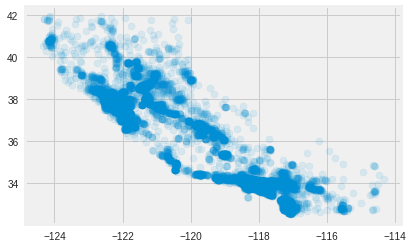

In [102]:
#wherever we see darker dots, they're overlapping implying a higher amount of population. 
plt.scatter(x=housing['longitude'], y=housing['latitude'],alpha=0.1)

In [103]:
import seaborn as sns

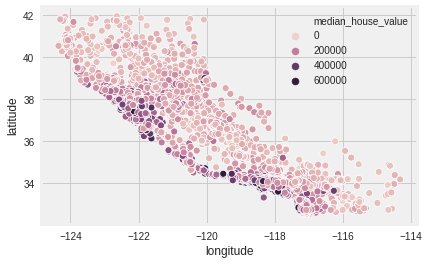

In [107]:
sns.scatterplot(data=housing, x='longitude' , y='latitude' , hue='median_house_value' )

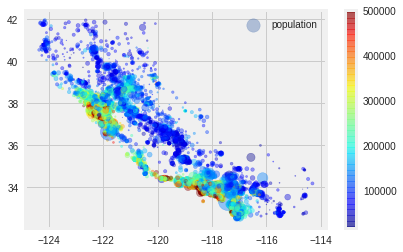

In [143]:

plt.scatter(x=housing['longitude'], y=housing['latitude'],
            alpha=0.4,c=housing['median_house_value'],
           ,cmap=plt.get_cmap('jet'),
            label='population'
           )
plt.colorbar()
plt.legend()

In [147]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686647
total_rooms           0.140323
housing_median_age    0.098210
households            0.072984
total_bedrooms        0.056057
population           -0.016927
longitude            -0.045144
latitude             -0.145791
Name: median_house_value, dtype: float64

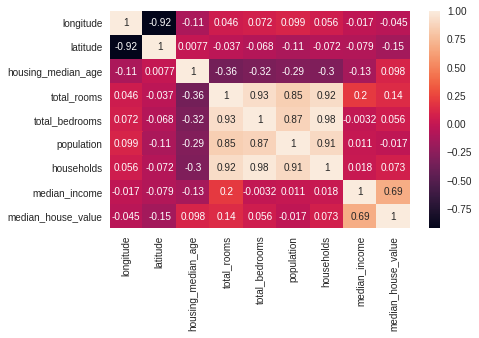

In [148]:
sns.heatmap(housing.corr(), annot=True)

In [149]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room_ration']=housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"]=housing["population"]/housing["households"]


In [150]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17428    -120.47     34.65                16.0       2549.0           428.0   
16684    -120.59     35.11                25.0       3642.0           726.0   
149      -122.22     37.80                52.0       2721.0           541.0   
11930    -117.39     33.93                26.0       3014.0           494.0   
20032    -119.03     36.07                26.0       3210.0           646.0   

       population  households  median_income  median_house_value  \
17428      1486.0       432.0         4.2875            150700.0   
16684      1729.0       673.0         3.1550            205400.0   
149        1185.0       515.0         4.5428            239800.0   
11930      1832.0       485.0         4.8333            127900.0   
20032      1908.0       642.0         2.4167             77600.0   

      ocean_proximity income_cat  rooms_per_household  \
17428      NEAR OCEAN          3             5.900463   
16684       <1H OCEAN          3             5.411590   
149          NEAR BAY          4             5.283495   
11930          INLAND          4             6.214433   
20032          INLAND          2             5.000000   

       bedrooms_per_room_ration  population_per_household  
17428                  0.167909                  3.439815  
16684                  0.199341                  2.569094  
149                    0.198824                  2.300971  
11930                  0.163902                  3.777320  
20032                  0.201246                  2.971963

In [152]:
housing.drop(columns=['income_cat'],axis=1,inplace=True)

In [157]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686647
rooms_per_household         0.145996
total_rooms                 0.140323
housing_median_age          0.098210
households                  0.072984
total_bedrooms              0.056057
population                 -0.016927
population_per_household   -0.019463
longitude                  -0.045144
latitude                   -0.145791
bedrooms_per_room_ration   -0.252843
Name: median_house_value, dtype: float64

In [160]:
import missingno


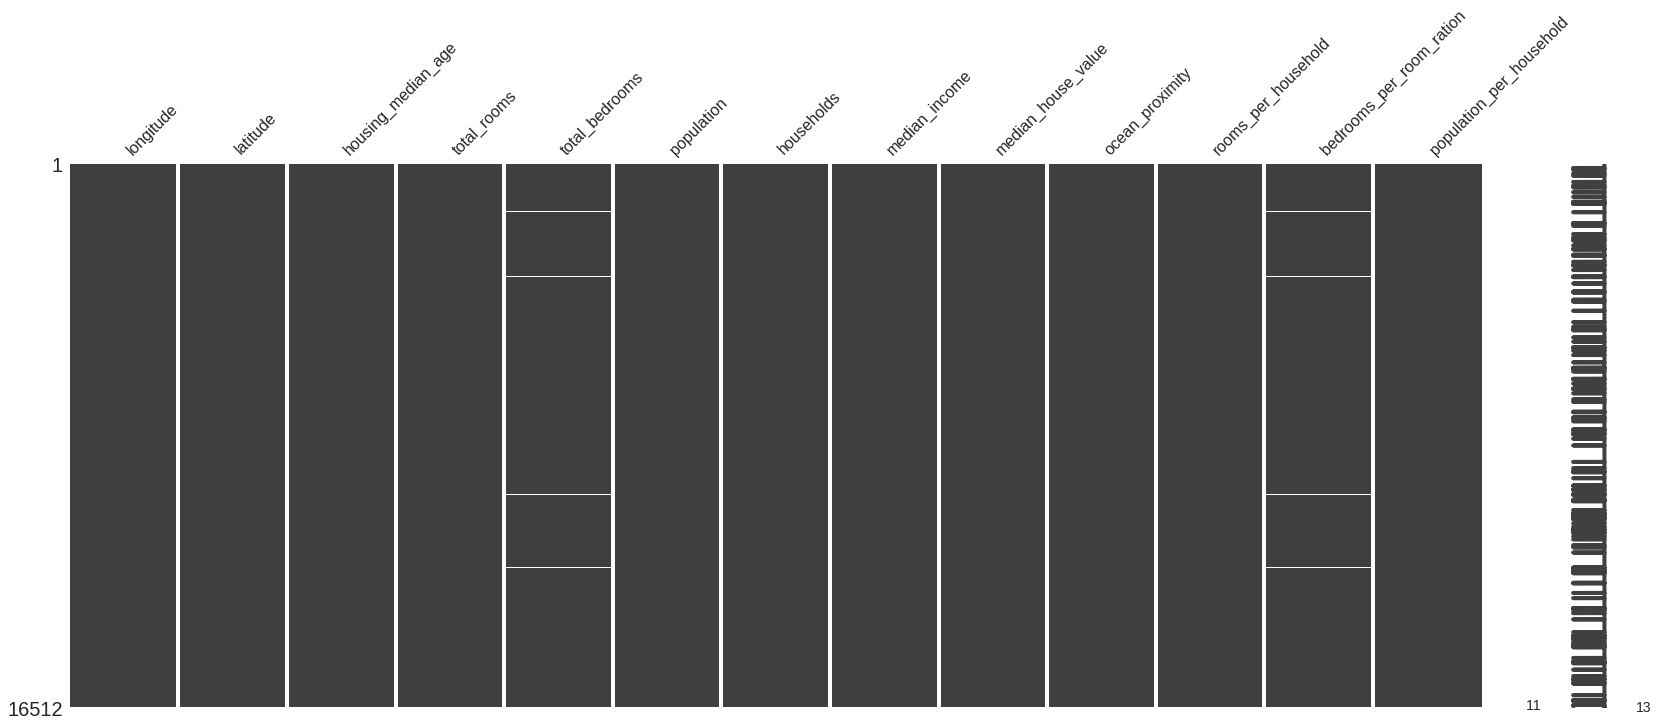

In [161]:
missingno.matrix(housing)

In [165]:
housing=housing.drop(columns=['median_house_value'])

In [166]:
housing_labels=strat_train_set['median_house_value']

In [169]:
housing

longitude  latitude  housing_median_age  total_rooms  households  \
17428    -120.47     34.65                16.0       2549.0       432.0   
16684    -120.59     35.11                25.0       3642.0       673.0   
149      -122.22     37.80                52.0       2721.0       515.0   
11930    -117.39     33.93                26.0       3014.0       485.0   
20032    -119.03     36.07                26.0       3210.0       642.0   
...          ...       ...                 ...          ...         ...   
9770     -121.33     36.43                40.0        622.0       196.0   
16978    -122.30     37.57                36.0       1973.0       370.0   
3199     -119.65     36.35                21.0       1745.0       292.0   
640      -122.15     37.72                29.0       4169.0       962.0   
620      -122.16     37.73                49.0       1699.0       385.0   

       median_income ocean_proximity  rooms_per_household  \
17428         4.2875      NEAR OCEAN             5.900463   
16684         3.1550       <1H OCEAN             5.411590   
149           4.5428        NEAR BAY             5.283495   
11930         4.8333          INLAND             6.214433   
20032         2.4167          INLAND             5.000000   
...              ...             ...                  ...   
9770          2.6250       <1H OCEAN             3.173469   
16978         5.0330        NEAR BAY             5.332432   
3199          4.3911          INLAND             5.976027   
640           2.8125        NEAR BAY             4.333680   
620           2.8301        NEAR BAY             4.412987   

       bedrooms_per_room_ration  population_per_household  
17428                  0.167909                  3.439815  
16684                  0.199341                  2.569094  
149                    0.198824                  2.300971  
11930                  0.163902                  3.777320  
20032                  0.201246                  2.971963  
...                         ...                       ...  
9770                   0.311897                  4.602041  
16978                  0.178409                  3.159459  
3199                   0.152436                  2.866438  
640                    0.251139                  2.103950  
620                    0.240141                  1.994805  

[16512 rows x 10 columns]

In [168]:
housing_labels

17428    150700.0
16684    205400.0
149      239800.0
11930    127900.0
20032     77600.0
           ...   
9770     109100.0
16978    270900.0
3199     107900.0
640      157400.0
620      171600.0
Name: median_house_value, Length: 16512, dtype: float64

In [170]:
from sklearn.impute import SimpleImputer

In [186]:
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop(columns=['ocean_proximity'])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [187]:
imputer.statistics_

array([-1.18520000e+02,  3.42600000e+01,  2.90000000e+01,  2.12300000e+03,
        4.08500000e+02,  3.53770000e+00,  5.23778385e+00,  2.02952808e-01,
        2.81899552e+00])

In [188]:
housing_num=imputer.transform(housing_num)

In [189]:
housing_num

array([[-120.47      ,   34.65      ,   16.        , ...,    5.90046296,
           0.16790898,    3.43981481],
       [-120.59      ,   35.11      ,   25.        , ...,    5.4115899 ,
           0.19934102,    2.56909361],
       [-122.22      ,   37.8       ,   52.        , ...,    5.28349515,
           0.19882396,    2.30097087],
       ...,
       [-119.65      ,   36.35      ,   21.        , ...,    5.9760274 ,
           0.15243553,    2.86643836],
       [-122.15      ,   37.72      ,   29.        , ...,    4.33367983,
           0.25113936,    2.1039501 ],
       [-122.16      ,   37.73      ,   49.        , ...,    4.41298701,
           0.24014126,    1.99480519]])

In [190]:
cols=housing.columns.drop('ocean_proximity')
cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room_ration', 'population_per_household'],
      dtype='object')

In [191]:
housing_num=pd.DataFrame(housing_num, columns=cols)

In [192]:
housing_num.head()

longitude  latitude  housing_median_age  total_rooms  households  \
0    -120.47     34.65                16.0       2549.0       432.0   
1    -120.59     35.11                25.0       3642.0       673.0   
2    -122.22     37.80                52.0       2721.0       515.0   
3    -117.39     33.93                26.0       3014.0       485.0   
4    -119.03     36.07                26.0       3210.0       642.0   

   median_income  rooms_per_household  bedrooms_per_room_ration  \
0         4.2875             5.900463                  0.167909   
1         3.1550             5.411590                  0.199341   
2         4.5428             5.283495                  0.198824   
3         4.8333             6.214433                  0.163902   
4         2.4167             5.000000                  0.201246   

   population_per_household  
0                  3.439815  
1                  2.569094  
2                  2.300971  
3                  3.777320  
4                  2.971963

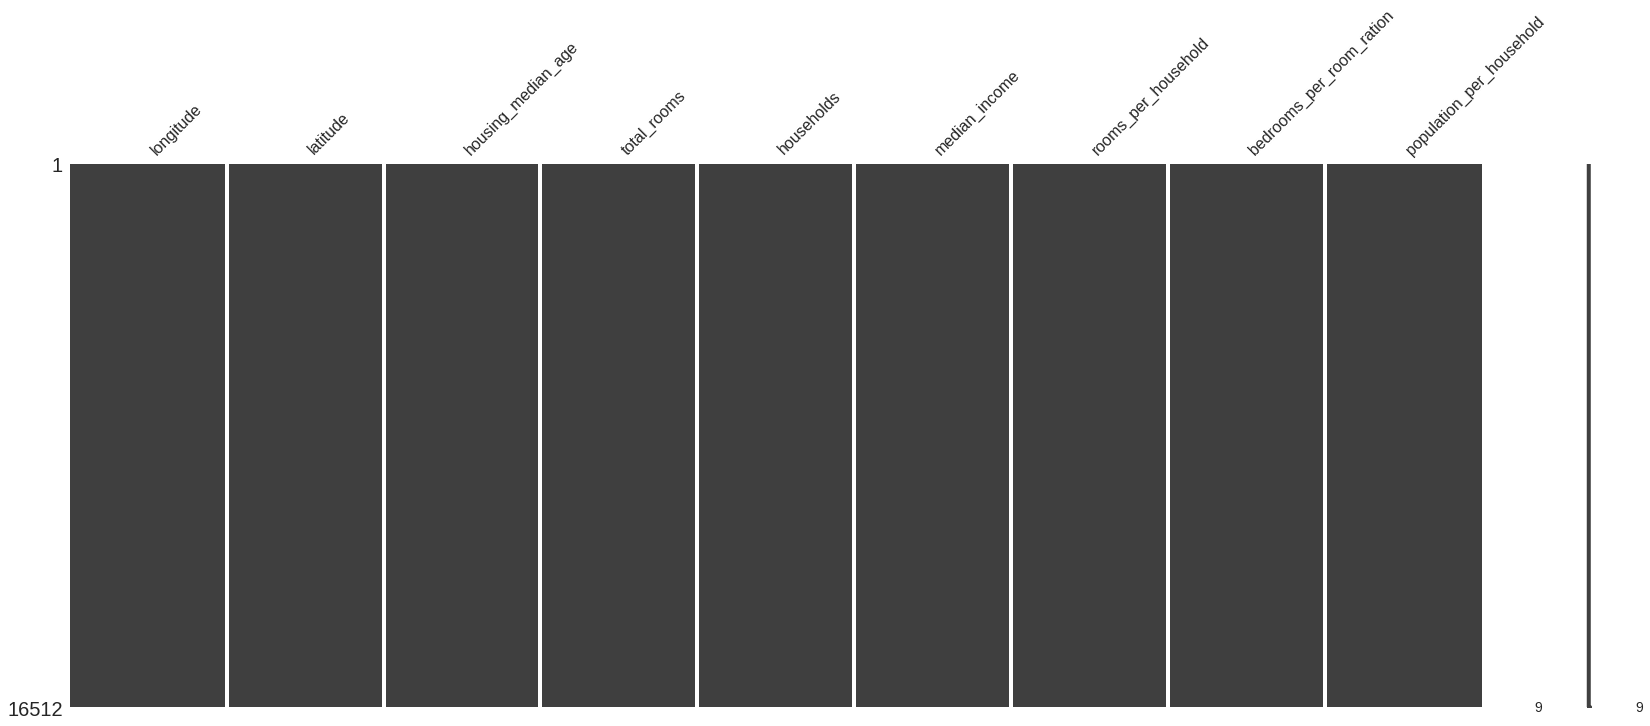

In [194]:
missingno.matrix(housing_num)

In [209]:
housing_cat=housing[['ocean_proximity']]

In [210]:
housing_cat.shape

(16512, 1)

In [211]:
housing_cat.head(20)

ocean_proximity
17428      NEAR OCEAN
16684       <1H OCEAN
149          NEAR BAY
11930          INLAND
20032          INLAND
12723          INLAND
5133        <1H OCEAN
17795       <1H OCEAN
3121           INLAND
12472          INLAND
2510           INLAND
13428          INLAND
20341       <1H OCEAN
19195       <1H OCEAN
1457           INLAND
10249       <1H OCEAN
18955          INLAND
15306      NEAR OCEAN
9479        <1H OCEAN
13638          INLAND

In [212]:
from sklearn.preprocessing import OneHotEncoder

In [248]:
cat_encoder=OneHotEncoder()
housing_cat_one_hot=cat_encoder.fit_transform(housing_cat)

In [249]:
housing_cat_one_hot=housing_cat_one_hot.toarray()

In [250]:
housing_cat_one_hot.shape

(16512, 5)

In [256]:
(cat_encoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [252]:
housing_cat_one_hot=pd.DataFrame(housing_cat_one_hot, columns=['<1H OCEAN', 'INLAND', 'ISLAND', 
                                                               'NEAR BAY', 'NEAR OCEAN'])

In [254]:
housing_cat_one_hot.columns

Index(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')

In [257]:
housing_num

longitude  latitude  housing_median_age  total_rooms  households  \
0        -120.47     34.65                16.0       2549.0       432.0   
1        -120.59     35.11                25.0       3642.0       673.0   
2        -122.22     37.80                52.0       2721.0       515.0   
3        -117.39     33.93                26.0       3014.0       485.0   
4        -119.03     36.07                26.0       3210.0       642.0   
...          ...       ...                 ...          ...         ...   
16507    -121.33     36.43                40.0        622.0       196.0   
16508    -122.30     37.57                36.0       1973.0       370.0   
16509    -119.65     36.35                21.0       1745.0       292.0   
16510    -122.15     37.72                29.0       4169.0       962.0   
16511    -122.16     37.73                49.0       1699.0       385.0   

       median_income  rooms_per_household  bedrooms_per_room_ration  \
0             4.2875             5.900463                  0.167909   
1             3.1550             5.411590                  0.199341   
2             4.5428             5.283495                  0.198824   
3             4.8333             6.214433                  0.163902   
4             2.4167             5.000000                  0.201246   
...              ...                  ...                       ...   
16507         2.6250             3.173469                  0.311897   
16508         5.0330             5.332432                  0.178409   
16509         4.3911             5.976027                  0.152436   
16510         2.8125             4.333680                  0.251139   
16511         2.8301             4.412987                  0.240141   

       population_per_household  
0                      3.439815  
1                      2.569094  
2                      2.300971  
3                      3.777320  
4                      2.971963  
...                         ...  
16507                  4.602041  
16508                  3.159459  
16509                  2.866438  
16510                  2.103950  
16511                  1.994805  

[16512 rows x 9 columns]

In [259]:
housing_final=pd.concat([housing_num, housing_cat_one_hot], axis=1)

In [260]:
housing_final.head()


longitude  latitude  housing_median_age  total_rooms  households  \
0    -120.47     34.65                16.0       2549.0       432.0   
1    -120.59     35.11                25.0       3642.0       673.0   
2    -122.22     37.80                52.0       2721.0       515.0   
3    -117.39     33.93                26.0       3014.0       485.0   
4    -119.03     36.07                26.0       3210.0       642.0   

   median_income  rooms_per_household  bedrooms_per_room_ration  \
0         4.2875             5.900463                  0.167909   
1         3.1550             5.411590                  0.199341   
2         4.5428             5.283495                  0.198824   
3         4.8333             6.214433                  0.163902   
4         2.4167             5.000000                  0.201246   

   population_per_household  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0                  3.439815        0.0     0.0     0.0       0.0         1.0  
1                  2.569094        1.0     0.0     0.0       0.0         0.0  
2                  2.300971        0.0     0.0     0.0       1.0         0.0  
3                  3.777320        0.0     1.0     0.0       0.0         0.0  
4                  2.971963        0.0     1.0     0.0       0.0         0.0

## Linear Regression (Underfits data)

In [262]:
from sklearn.linear_model import LinearRegression 

In [264]:
linear_reg=LinearRegression()
linear_reg.fit(housing_final, housing_labels)

LinearRegression()

In [268]:
some_data=housing_final.iloc[:5]
some_labels=housing_labels[:5]

In [269]:
linear_reg.predict(some_data)

array([261617.92382358, 218865.97944581, 285919.23088451, 190143.96289189,
        91332.47102907])

In [270]:
some_labels

17428    150700.0
16684    205400.0
149      239800.0
11930    127900.0
20032     77600.0
Name: median_house_value, dtype: float64

In [273]:
from sklearn.metrics import mean_squared_error
housing_predict=linear_reg.predict(housing_final)
mse=mean_squared_error(housing_predict, housing_labels)
mse=np.sqrt(mse)
print(mse)

70274.435449192


## Decsision Trees (Overfits data )

In [276]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(housing_final, housing_labels)

DecisionTreeRegressor()

In [282]:
housing_predict=decision_tree.predict(housing_final)
mse=mean_squared_error(housing_labels, housing_predict )
mse=np.sqrt(mse)
print(mse)

0.0


### an error of 0 clearly indicates it has overfit the data 

In [283]:
from sklearn.model_selection import cross_val_score

In [292]:
scores=cross_val_score(decision_tree,housing_final, housing_labels,cv=10,scoring='neg_mean_squared_error')

In [295]:
print(np.sqrt(-scores).mean()) #doesnt perfrom well in cross validation, worse than linear reg!

70693.97582003004


### Rnadom Forests perform best among the lot

In [296]:
from sklearn.ensemble import RandomForestRegressor

In [301]:
random_forest=RandomForestRegressor()
random_forest.fit(housing_final, housing_labels)
housing_predict=random_forest.predict(housing_final)
mse=mean_squared_error(housing_labels, housing_predict)
mse=np.sqrt(mse)
print(mse)

18609.486534626747


In [302]:
scores=cross_val_score(random_forest,housing_final, housing_labels,cv=10, scoring='neg_mean_squared_error' )

In [303]:
print(np.sqrt(-scores).mean())

49969.29754957483


### Hyper parameter Tuning!

In [306]:
from sklearn.model_selection import GridSearchCV

In [312]:
param_grid = [
 {'n_estimators': [30, 40, 50], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

In [313]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_final, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 40, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [314]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 40}

In [315]:
cvres=grid_search.cv_results_

In [316]:
cvres

{'mean_fit_time': array([0.56056714, 0.71087427, 0.88528543, 0.86326709, 1.13882818,
        1.43703709, 1.23096561, 1.61055331, 2.10259547, 1.56451545,
        2.15737214, 2.68924465, 0.08736887, 0.27552528, 0.13636889,
        0.3789681 , 0.14156914, 0.48476701]),
 'std_fit_time': array([0.0304191 , 0.01099918, 0.00932653, 0.0101078 , 0.00427593,
        0.00424066, 0.02335561, 0.01996011, 0.12352445, 0.00440256,
        0.07388934, 0.08219233, 0.00269826, 0.00362809, 0.0298736 ,
        0.03173082, 0.00277976, 0.05120743]),
 'mean_score_time': array([0.03215184, 0.03996778, 0.0477982 , 0.02761226, 0.03443551,
        0.04336286, 0.02770848, 0.03480611, 0.04402313, 0.02645292,
        0.03488035, 0.04376359, 0.00487761, 0.01164975, 0.00705791,
        0.01150017, 0.00496941, 0.01144128]),
 'std_score_time': array([1.16335170e-03, 7.41114832e-04, 1.38106122e-03, 1.13626545e-03,
        1.76533527e-04, 2.02540645e-04, 1.89077704e-03, 2.26599851e-04,
        8.36651561e-04, 2.07775060e-

In [317]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51102.02704754279 {'max_features': 2, 'n_estimators': 30}
50716.79964279528 {'max_features': 2, 'n_estimators': 40}
50210.38421374553 {'max_features': 2, 'n_estimators': 50}
49334.79775135685 {'max_features': 4, 'n_estimators': 30}
49275.620858818074 {'max_features': 4, 'n_estimators': 40}
49342.61096035773 {'max_features': 4, 'n_estimators': 50}
49903.123413003 {'max_features': 6, 'n_estimators': 30}
49279.93711411088 {'max_features': 6, 'n_estimators': 40}
49407.81147825365 {'max_features': 6, 'n_estimators': 50}
49945.911156690534 {'max_features': 8, 'n_estimators': 30}
49670.0391951432 {'max_features': 8, 'n_estimators': 40}
49835.326322817345 {'max_features': 8, 'n_estimators': 50}
59769.18436860723 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52574.02218179821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58350.35532783609 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50976.91126513232 {'bootstrap': False, 'max_features': 3, 'n_estimators'